# MNSIT Digit classifiaction using CNN

In [64]:
# Import important library
import numpy as np
import pandas as ps 
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation, Dropout


In [4]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [5]:
# Show Data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


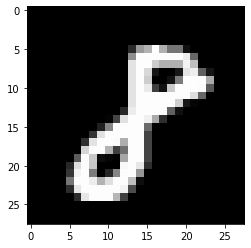

In [6]:
# Let's see in image form
img_index = 31 # select anything up to 60000
plt.imshow(x_train[img_index], cmap = 'gray')
plt.show()

In [7]:
# Reshaping the images so that it work on Keras API
# Keras accept input data as -> (num_img, img_shape, img_chenal)
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [8]:
# Data Scaling & Normalization
# Making Sure that the values are float so that we can decimal points after division 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Normalization the RBG codes by dividing it to the max RGB values.
x_train/=255-0.5
x_test/=255-0.5

In [65]:
## Creating a Sequential model for CNN in Keras

num_filter = 32
num_filter1 = 64
num_filter2 = 8
filter_size = 3
filter_size1 = 5
pool_size1 = 2

model = Sequential()
model.add(Conv2D(num_filter, filter_size, strides=(1,1), activation = 'relu', input_shape=(28,28,1)))
model.add(Conv2D(num_filter1, filter_size, strides=(1,1), activation = 'relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=pool_size1))

model.add(Conv2D(num_filter, filter_size1, strides=(1,1), activation = 'relu'))
model.add(Conv2D(num_filter2, filter_size1, strides=(1,1), activation = 'relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=pool_size1))


model.add(Flatten())
model.add(Dense(10,activation = 'softmax'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 4, 4, 8)           6408      
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 8)         

In [66]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Train the model
model_history = model.fit(x_train, to_categorical(y_train), epochs =10, verbose =1, validation_data=(x_test,to_categorical(y_test)))

Epoch 1/10
1875/1875 [==============================] - 296s 157ms/step - loss: 0.4221 - accuracy: 0.8659 - val_loss: 0.0665 - val_accuracy: 0.9841
Epoch 2/10
1875/1875 [==============================] - 259s 138ms/step - loss: 0.0641 - accuracy: 0.9804 - val_loss: 0.0601 - val_accuracy: 0.9873
Epoch 3/10
1875/1875 [==============================] - 240s 128ms/step - loss: 0.0454 - accuracy: 0.9860 - val_loss: 0.0512 - val_accuracy: 0.9909
Epoch 4/10
1875/1875 [==============================] - 237s 127ms/step - loss: 0.0361 - accuracy: 0.9887 - val_loss: 0.0336 - val_accuracy: 0.9913
Epoch 5/10
1875/1875 [==============================] - 237s 126ms/step - loss: 0.0304 - accuracy: 0.9908 - val_loss: 0.0296 - val_accuracy: 0.9920
Epoch 6/10
1875/1875 [==============================] - 239s 128ms/step - loss: 0.0261 - accuracy: 0.9914 - val_loss: 0.0292 - val_accuracy: 0.9920
Epoch 7/10
1875/1875 [==============================] - 238s 127ms/step - loss: 0.0220 - accuracy: 0.9930 - val_

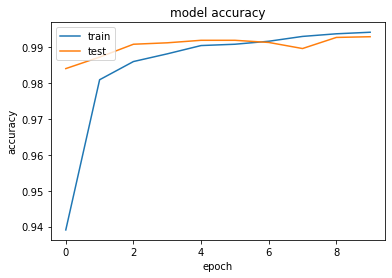

In [67]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

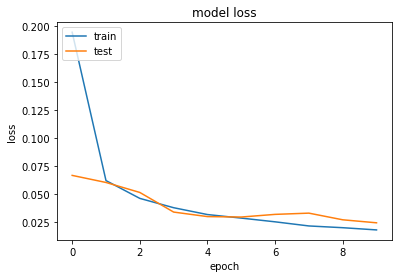

In [68]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [69]:
# Score
score = model.evaluate(x_test, to_categorical(y_test), verbose=0)
print('Test Loss', score[0])
print('Test accuracy', score[1])

Test Loss 0.02402031607925892
Test accuracy 0.9929999709129333


In [70]:
# Predict the first 5 images
prediction = model.predict(x_test[:5])
print(prediction)

# Print our model Prediction
print(np.argmax(prediction, axis=1))

#Check our prediction against the grount truth
print(y_test[:5])

[[9.46446974e-08 3.90284322e-06 1.16913020e-06 5.72201725e-06
  4.53662636e-08 2.25240137e-06 3.43918054e-11 9.99986410e-01
  8.03836375e-09 3.97814460e-07]
 [2.39737619e-05 2.37509623e-04 9.99663591e-01 7.51758034e-06
  1.36075305e-05 7.05740311e-09 3.74400079e-05 9.06312653e-06
  7.34431114e-06 6.06631856e-09]
 [5.65597098e-08 9.99441564e-01 1.91062145e-06 5.39579958e-07
  1.25774415e-04 3.44519503e-06 2.24948099e-06 4.14777402e-04
  6.47851448e-06 3.20590789e-06]
 [9.99265134e-01 8.08733636e-10 4.10367902e-05 1.83681605e-05
  1.00765118e-09 1.40192360e-05 3.69140587e-04 6.86094779e-07
  3.08296039e-05 2.60775181e-04]
 [4.97407616e-13 2.64164413e-07 5.61280578e-10 5.22184553e-12
  9.99990582e-01 1.40063777e-11 2.29449723e-10 1.22663781e-08
  5.50880304e-06 3.68428709e-06]]
[7 2 1 0 4]
[7 2 1 0 4]
